In [ ]:
# How to Handle Class Imbalance with ydata-synthetic

In [2]:
!pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/a4/8e/4077b08b95a1f8302c694a8b399bd413815fbe89045c41e6e08cd7d9439a/kagglehub-0.3.13-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.2 MB/s eta 0:00:00


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashwatwork/cerebral-stroke-predictionimbalaced-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cerebral-stroke-predictionimbalaced-dataset


## About

The ydata-synthetic library is a powerful Python tool for creating synthetic data, particularly for **tabular** and **time-series data**. It leverages cutting-edge Generative AI models to understand the characteristics of real data and generate synthetic data that closely resembles the real thing.

### What is synthetic data?
Synthetic data is data that's artificially generated and not sourced from real-world events. It mimics the statistical patterns of real data without containing any personally identifiable information, safeguarding individuals' privacy.

**Why use Synthetic Data?**
Synthetic data has various practical applications:

- Ensuring privacy compliance when sharing data or developing machine learning models.
- Mitigating biases in datasets.
- Balancing imbalanced datasets.
- Expanding the size of datasets through data augmentation.

### Supported Generative AI Models
The following architectures are supported:

For tabular data:
- **GAN**
- **CGAN** (Conditional GAN) - deep learning model that combines GANs with conditional models to generate data samples based on specific conditions.
- **WGAN** (Wasserstein GAN) - - utilizes the Wasserstein distance to improve training stability and generate higher quality samples.
- **WGAN-GP** (Wassertein GAN with Gradient Penalty) - incorporates a gradient penalty term to enhance training stability and improve the diversity of generated samples.
- **DRAGAN** (Deep Regret Analytic GAN) - GAN variant that uses a gradient penalty to improve training stability and mitigate mode collapse.
- **Cramer GAN** (Cramer Distance Solution to Biased Wasserstein Gradients) - employs the Cramer distance as a measure of similarity between real and generated data distributions to improve training stability and enhance sample quality.
- **CWGAN-GP** (Conditional Wassertein GAN with Gradient Penalty) - incorporates conditional information to generate data samples, while leveraging the Wasserstein distance to improve training stability and sample quality.
- **CTGAN** (Conditional Tabular GAN) - was specifically designed to deal with the challenges posed by tabular datasets, handling mixed (numeric and categorical) data.

For time-series data:
- **TimeGAN** - generate synthetic time series data by learning the underlying temporal dependencies and characteristics of the original data.
- **DoppelGANger**.

## Installing and importing libraries

In [3]:
!python -m pip install --upgrade pip


First we install the necessary libraries as shown below.

In [5]:
pip install ydata-synthetic

  Obtaining dependency information for ydata-synthetic from https://files.pythonhosted.org/packages/b1/32/7d7b040877236f47b478a916f64e3e44a2829bae6b1523333fc0d4877169/ydata_synthetic-1.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests<2.31,>=2.28 from https://files.pythonhosted.org/packages/96/80/034ffeca15c0f4e01b7b9c6ad0fb704b44e190cde4e757edbd60be404c41/requests-2.30.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow==2.15.* from https://files.pythonhosted.org/packages/4f/42/433c0c64c5d3b8bee696cde2006d15f03f0504c2f746d49f38e32e52e239/tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pmlb==1.0.* from https://files.pythonhosted.org/packages/db/e3/6e6d1cb10b6736ceb1693f6ad8f8f979a3c8a101e9b20c4fd1a1613d3a76/pmlb-1.0.1.post3-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard==4.2.* from htt

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.simplefilter(action='ignore')

from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-10-04 16:53:08.771883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-04 16:53:08.771956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-04 16:53:08.774014: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data load and review

In [7]:
data = pd.read_csv('/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [8]:
data = data.drop_duplicates()
data['age'] = data['age'].astype(int)

In [9]:
data['smoking_status'] = data['smoking_status'].fillna('No Info')

In [10]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [34]:
data.smoking_status.unique()

array(['No Info', 'never smoked', 'formerly smoked', 'smokes'],
      dtype=object)

In [35]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  int64  
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.0+ MB


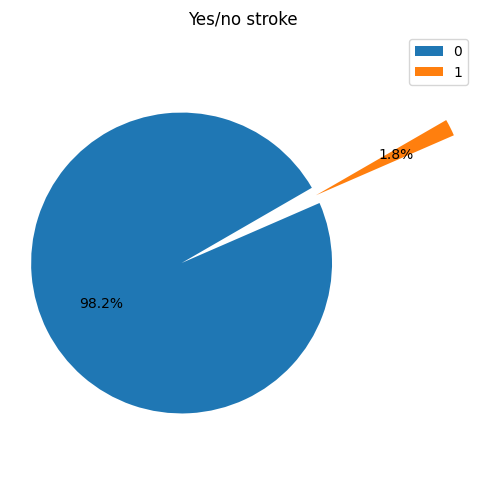

In [12]:
# check the balance of the target class
def balanced_plot(data):

    plt.figure(figsize=(6, 6))
    plt.pie(data.stroke.value_counts(), 
            data.stroke.value_counts().index, 
            autopct='%1.1f%%', 
            startangle=30)
    plt.axis('equal')
    plt.legend(data.stroke.value_counts().index, loc='best')
    plt.title('Yes/no stroke')
    plt.show()
    
balanced_plot(data)

We can see there is a huge imbalance in the target class. An imbalanced dataset can pose several challenges, including:

- **Biased Model Performance**: ML models trained on imbalanced datasets may exhibit biased predictions, as they tend to favor the majority class, potentially leading to inaccurate results.

- **Reduced Predictive Accuracy**: Imbalanced datasets can lead to reduced predictive accuracy for the minority class, making it challenging to correctly identify and predict the outcomes related to that class.

- **Overfitting**: Models can overfit to the majority class, as they have more data points to learn from, resulting in poor generalization to the minority class.

## Random Forest on imbalanced dataset

In [29]:
# split data into train and test

train_data, test_data = train_test_split(data, test_size = 0.15, stratify=data.stroke,
                                                    random_state=42)

In [30]:
def features_target_split(df):
    X = df.drop('stroke', axis=1)
    y = df.stroke
    return X, y

In [31]:
X_train, y_train = features_target_split(train_data)
X_test, y_test = features_target_split(test_data)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36890 entries, 14217 to 21868
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 36890 non-null  int64  
 1   gender             36890 non-null  object 
 2   age                36890 non-null  int64  
 3   hypertension       36890 non-null  int64  
 4   heart_disease      36890 non-null  int64  
 5   ever_married       36890 non-null  object 
 6   work_type          36890 non-null  object 
 7   Residence_type     36890 non-null  object 
 8   avg_glucose_level  36890 non-null  float64
 9   bmi                36890 non-null  float64
 10  smoking_status     36890 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 3.4+ MB


In [16]:
cat_features = X_train.columns[X_train.dtypes == 'object']
num_features = X_train.columns[(X_train.dtypes == 'int64') | (X_train.dtypes == 'float64')]

In [17]:
# Pipeline for RandomForest

# encode categorical features
cat_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

# scale numeric features
num_transformer = Pipeline(steps=[
   ('scaler', StandardScaler()),
])

# combine Pipeline for preprocessing
preprocessor = ColumnTransformer(
   transformers=[
       ('cat', cat_transformer, cat_features),
       ('num', num_transformer, num_features),
   ])

# final Pipeline
forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestClassifier(class_weight='balanced',random_state=42))])

In [18]:
# function to show different scores

def score_func(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Stroke', 'Got Stroke'],
                yticklabels=['No Stroke', 'Got Stroke'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print(metrics.classification_report(y_test,predictions))

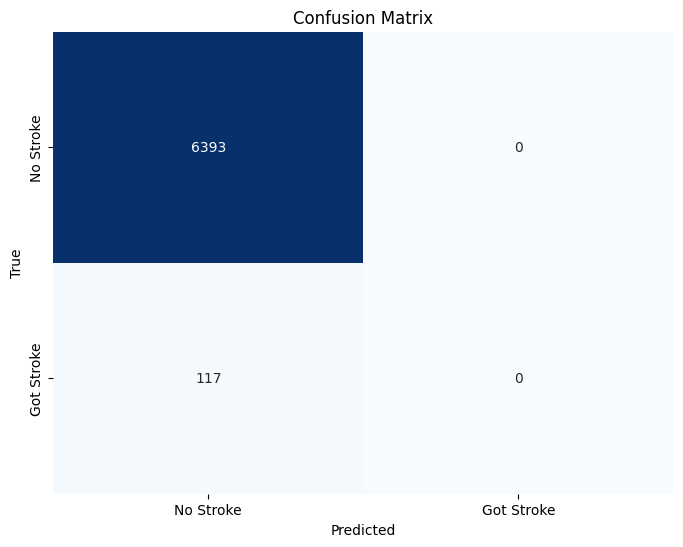

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6393
           1       0.00      0.00      0.00       117

    accuracy                           0.98      6510
   macro avg       0.49      0.50      0.50      6510
weighted avg       0.96      0.98      0.97      6510



In [19]:
#execution time 5.017s
score_func(forest_pipe, X_train, y_train, X_test, y_test)

## Use of ydata-synthetic

In [20]:
#Synthesize the minority class
training_df = train_data.loc[train_data.stroke == 1].copy()

training_df.drop('stroke', axis=1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
24514,66416,Female,80,0,0,Yes,Self-employed,Rural,206.74,30.900000,formerly smoked
23075,54904,Female,67,0,0,Yes,Private,Rural,184.43,29.700000,No Info
25822,61469,Male,75,0,1,Yes,Self-employed,Urban,183.25,32.600000,formerly smoked
26160,40104,Female,65,0,1,Yes,Self-employed,Urban,141.07,28.605038,formerly smoked
17706,10465,Male,79,0,0,No,Self-employed,Rural,71.94,30.300000,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
20225,29632,Female,45,0,0,Yes,Private,Urban,95.86,32.500000,never smoked
25072,8572,Female,56,0,0,Yes,Govt_job,Urban,108.82,30.300000,never smoked
42422,71483,Male,79,0,0,Yes,Self-employed,Urban,133.45,22.800000,formerly smoked
36668,573,Male,68,0,1,No,Self-employed,Rural,217.50,24.500000,formerly smoked


In [21]:
# for proper loading on GPU - 0.073s

import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [22]:
num_features = list(num_features)
cat_features = list(cat_features)

In [136]:
import inspect
print(inspect.getsource(RegularSynthesizer))

class RegularSynthesizer():
    "Abstraction class "
    def __new__(cls, modelname: str, model_parameters =None, **kwargs):
        model = None
        if Model(modelname) == Model.FAST:
            model=Model(modelname).function(**kwargs)
        else:
            model=Model(modelname).function(model_parameters, **kwargs)

        logger.info_def_report(model=modelname)
        return model

    @staticmethod
    def load(path):
        """
        ### Description:
        Loads a saved synthesizer from a pickle.

        ### Args:
        `path` (str): Path to read the synthesizer pickle from.
        """
        gpu_devices = tfconfig.list_physical_devices('GPU')
        if len(gpu_devices) > 0:
            try:
                tfconfig.experimental.set_memory_growth(gpu_devices[0], True)
            except (ValueError, RuntimeError):
                # Invalid device or cannot modify virtual devices once initialized.
                pass
        synth = load(path)
        if isi

In [137]:
from ydata_synthetic.synthesizers import Model
print([m for m in Model])

ImportError: cannot import name 'Model' from 'ydata_synthetic.synthesizers' (/opt/conda/lib/python3.10/site-packages/ydata_synthetic/synthesizers/__init__.py)

In [140]:
ctgan_args = {
    "batch_size": 256,
    "epochs": 500,
    "n_critic": 5,   # REQUIRED argument
    "learning_rate": 2e-4,
    "latent_dim": 128,
    "hidden_dim": 128
}

In [23]:
# Define model and training parameters - 146.435s
ctgan_args = ModelParameters(batch_size=100, lr=1e-4, betas=(0.9, 0.999))
train_args = TrainParameters(epochs=40)

# Train the generator model
synth = RegularSynthesizer(modelname="ctgan", model_parameters=ctgan_args)
synth.fit(data=training_df, train_arguments=train_args, num_cols=num_features, cat_cols=cat_features+['stroke'])

Epoch: 0 | critic_loss: 6.713244438171387 | generator_loss: 0.9849585294723511
Epoch: 1 | critic_loss: 6.692352771759033 | generator_loss: 0.9122869372367859
Epoch: 2 | critic_loss: 6.306205749511719 | generator_loss: 0.7419806718826294
Epoch: 3 | critic_loss: 5.591357707977295 | generator_loss: 0.7139495611190796
Epoch: 4 | critic_loss: 4.864358425140381 | generator_loss: 0.8783478736877441
Epoch: 5 | critic_loss: 4.9672322273254395 | generator_loss: 0.5541584491729736
Epoch: 6 | critic_loss: 4.082153797149658 | generator_loss: 0.45226818323135376
Epoch: 7 | critic_loss: 3.934119701385498 | generator_loss: 0.5028731822967529
Epoch: 8 | critic_loss: 2.7789063453674316 | generator_loss: 0.6555595397949219
Epoch: 9 | critic_loss: 2.247408866882324 | generator_loss: 0.5725282430648804
Epoch: 10 | critic_loss: 1.5116660594940186 | generator_loss: 0.4259459972381592
Epoch: 11 | critic_loss: 0.566052258014679 | generator_loss: 0.25225523114204407
Epoch: 12 | critic_loss: 0.5872169137001038 |

In [24]:
# Generate 67000 new synthetic samples - 11.279s
synth_data = synth.sample(30000)

In [25]:
synth_data['stroke'] = 1
synth_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,33519,Male,96,0,0,Yes,Self-employed,Urban,290.613590,25.116057,never smoked,1
1,39248,Female,83,0,0,Yes,Self-employed,Rural,133.592686,25.152299,No Info,1
2,80828,Female,90,0,0,Yes,Private,Urban,294.481318,14.259291,formerly smoked,1
3,78208,Male,85,0,0,Yes,Self-employed,Urban,295.357583,24.934795,No Info,1
4,89359,Male,96,0,0,Yes,Govt_job,Rural,198.747231,25.970099,smokes,1


In [26]:
synth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30000 non-null  int64  
 1   gender             30000 non-null  object 
 2   age                30000 non-null  int64  
 3   hypertension       30000 non-null  int64  
 4   heart_disease      30000 non-null  int64  
 5   ever_married       30000 non-null  object 
 6   work_type          30000 non-null  object 
 7   Residence_type     30000 non-null  object 
 8   avg_glucose_level  30000 non-null  float64
 9   bmi                30000 non-null  float64
 10  smoking_status     30000 non-null  object 
 11  stroke             30000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


In [27]:
# combine with train data - 0.032s

combined_data = pd.concat([train_data, synth_data], ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66890 entries, 0 to 66889
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 66890 non-null  int64  
 1   gender             66890 non-null  object 
 2   age                66890 non-null  int64  
 3   hypertension       66890 non-null  int64  
 4   heart_disease      66890 non-null  int64  
 5   ever_married       66890 non-null  object 
 6   work_type          66890 non-null  object 
 7   Residence_type     66890 non-null  object 
 8   avg_glucose_level  66890 non-null  float64
 9   bmi                66890 non-null  float64
 10  smoking_status     66890 non-null  object 
 11  stroke             66890 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.1+ MB


In [54]:
data['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [55]:
combined_data['stroke'].value_counts()

stroke
0    36224
1    30666
Name: count, dtype: int64

In [74]:
balanced_plot(combined_data)

NameError: name 'balanced_plot' is not defined

Now we have balanced dataset. Let's check if the model's results change.

In [28]:
X_train_comb, y_train_comb = features_target_split(combined_data)

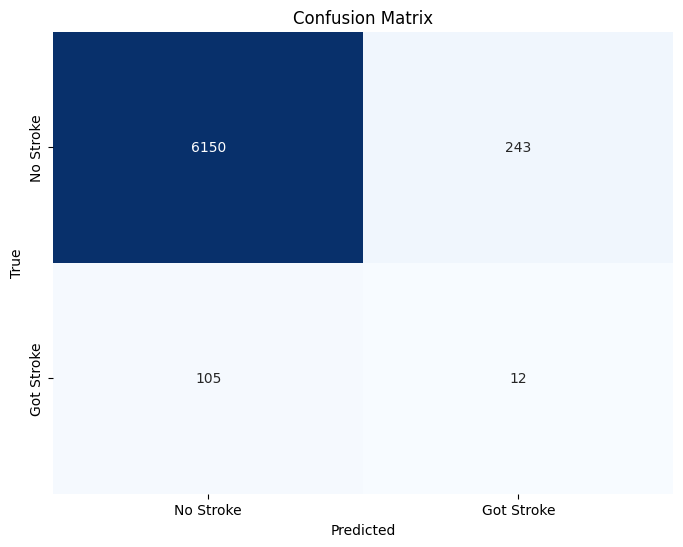

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6393
           1       0.05      0.10      0.06       117

    accuracy                           0.95      6510
   macro avg       0.52      0.53      0.52      6510
weighted avg       0.97      0.95      0.96      6510



In [129]:
#execution time 10.326s
score_func(forest_pipe, X_train_comb, y_train_comb, X_test, y_test)

We see that the recall of class 1 has increased. This means our model now identifies more people with diabetes.

## Upsampling

Now let's compare the data synthesis method with simple upsampling.

In [ ]:
#execution time 0.049s
def upsample(df, repeat):
    df_zeros = df[df.stroke == 0]
    df_ones = df[df.stroke == 1]

    df_upsampled = pd.concat([df_zeros] + [df_ones] * repeat)
    
    df_upsampled = shuffle(df_upsampled, random_state=42).reset_index(drop=True)
    
    return df_upsampled

data_upsampled = upsample(train_data, 10)

In [ ]:
balanced_plot(data_upsampled)

In [ ]:
X_train_ups, y_train_ups = features_target_split(data_upsampled)

In [ ]:
#xecution time 7.749s
score_func(forest_pipe, X_train_ups, y_train_ups, X_test, y_test)